In [1]:
# 1. Thêm các thư viện cần thiết
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

import os
import time

In [2]:
# 2. check number image
train_dir = r"../input/gender-classification-dataset/Training/"
val_dir = r"../input/gender-classification-dataset/Validation/"
CATEGORIES = ["male","female"]

for category in CATEGORIES:
    train_path = train_dir + category
    val_path = val_dir + category
    print('number of', category, 'training images - ',len(os.listdir(train_path)))
    print('number of', category, 'training images - ',len(os.listdir(val_path)))

number of male training images -  23766
number of male training images -  5808
number of female training images -  23243
number of female training images -  5841


Text(0.5, 1.0, 'male')

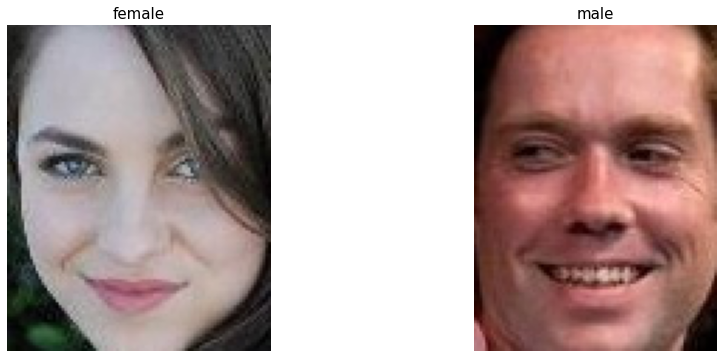

In [3]:
# 3. show image
fig, axes = plt.subplots(1, 2, figsize = (15,6))
axes = axes.ravel()

axes[0].imshow(mpimg.imread(train_dir + 'female/131422.jpg.jpg'))
axes[0].axis('off')
axes[0].set_title('female', fontsize=15)

axes[1].imshow(mpimg.imread(train_dir + '/male/090544.jpg.jpg'))
axes[1].axis('off')
axes[1].set_title('male', fontsize=15)

In [4]:
# 4. load data
width = height = 64
channel = 3
batch_size = 64
generator = ImageDataGenerator(rescale= 1./255, validation_split=0.2)
train_generator = generator.flow_from_directory(directory = train_dir,
                                                   target_size = (width, height),
                                                   class_mode='binary',
                                                   subset='training',
                                                   batch_size = batch_size,
                                                   color_mode= "rgb")

test_generator = generator.flow_from_directory(directory = train_dir,
                                                   target_size = (width, height),
                                                   class_mode='binary',
                                                   subset='validation',
                                                   batch_size = batch_size,
                                                   color_mode= "rgb")

val_generator = generator.flow_from_directory(directory = val_dir,
                                                  target_size = (width, height),
                                                  class_mode= 'binary',
                                                  batch_size = batch_size,
                                                  color_mode= "rgb")

labels = (train_generator.class_indices)
print (labels)

Found 37608 images belonging to 2 classes.
Found 9401 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.
{'female': 0, 'male': 1}


In [5]:
# 5. build model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channel)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         7

2022-07-12 07:28:26.579945: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
# 6. train model
start_time = time.time()
H =  model.fit(train_generator, epochs = 10, validation_data = val_generator, verbose=1)
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

2022-07-12 07:28:27.169228: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
588/588 [==============================] - 257s 435ms/step - loss: 0.2751 - accuracy: 0.8773 - val_loss: 0.1608 - val_accuracy: 0.9386
Epoch 2/10
588/588 [==============================] - 116s 197ms/step - loss: 0.1516 - accuracy: 0.9463 - val_loss: 0.1299 - val_accuracy: 0.9509
Epoch 3/10
588/588 [==============================] - 114s 194ms/step - loss: 0.1381 - accuracy: 0.9502 - val_loss: 0.1226 - val_accuracy: 0.9550
Epoch 4/10
588/588 [==============================] - 116s 196ms/step - loss: 0.1217 - accuracy: 0.9560 - val_loss: 0.1269 - val_accuracy: 0.9539
Epoch 5/10
588/588 [==============================] - 112s 191ms/step - loss: 0.1099 - accuracy: 0.9608 - val_loss: 0.1104 - val_accuracy: 0.9603
Epoch 6/10
588/588 [==============================] - 112s 190ms/step - loss: 0.1039 - accuracy: 0.9630 - val_loss: 0.1139 - val_accuracy: 0.9596
Epoch 7/10
588/588 [==============================] - 112s 191ms/step - loss: 0.0984 - accuracy: 0.9657 - val_loss: 0.1057 -

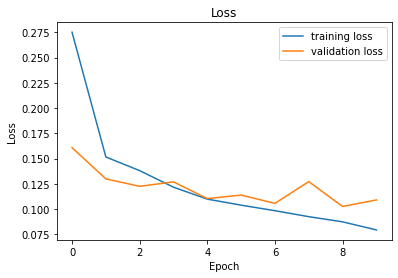

In [7]:
# 7. Vẽ đồ thị loss của traning set và validation set
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

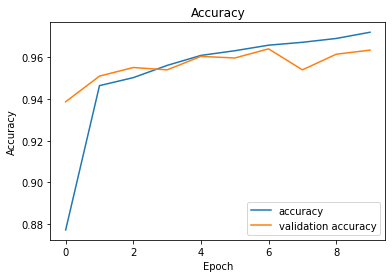

In [8]:
# 8. Vẽ đồ thị accuracy của traning set và validation set
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [9]:
# 9. Đánh giá model với testset
start_time = time.time()
print('[loss, accuracy]: ', model.evaluate(test_generator, verbose = 1))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

147/147 [==============================] - 47s 318ms/step - loss: 0.1158 - accuracy: 0.9586
[loss, accuracy]:  [0.11581090092658997, 0.9586214423179626]
Running time: 46.96 (s)
